In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Inference for Regression ##

Thus far, our analysis of the relation between variables has been purely descriptive. We know how to find the best straight line to draw through a scatter plot. The line is the best in the sense that it has the smallest mean squared error of estimation among all straight lines.

But what if our data were only a sample from a larger population? If in the sample we found a linear relation between the two variables, would the same be true for the population? Would it be exactly the same linear relation? Could we predict the response of a new individual who is not in our sample?

Such questions of inference and prediction arise if we believe that a scatter plot reflects the underlying relation between the two variables being plotted but does not specify the relation completely. For example, a scatter plot of birth weight versus gestational days shows us the precise relation between the two variables in our sample; but we might wonder whether that relation holds true, or almost true, for all babies in the population from which the sample was drawn, or indeed among babies in general.

As always, inferential thinking begins with a careful examination of the assumptions about the data. Sets of assumptions are known as models. Sets of assumptions about randomness in roughly linear scatter plots are called regression models.


## Regression Model ##

In brief, such models say that the underlying relation between the two variables is perfectly linear; this straight line is the signal that we would like to identify. However, we are not able to see the line clearly. What we see are points that are scattered around the line. In each of the points, the signal has been contaminated by random noise. Our inferential goal, therefore, is to separate the signal from the noise.

In greater detail, the regression model specifies that the points in the scatter plot are generated at random as follows.

-> The relation between x and y is perfectly linear. We cannot see this “true line” but it exists.

-> The scatter plot is created by taking points on the line and pushing them off the line vertically, either above or below

-> Finally, erase the true line from the scatter, and display just the points created.

Based on this scatter plot, how should we estimate the true line? The best line that we can put through a scatter plot is the regression line. So the regression line is a natural estimate of the true line.

The simulation below shows how close the regression line is to the true line. The first panel shows how the scatter plot is generated from the true line. The second shows the scatter plot that we see. The third shows the regression line through the plot. The fourth shows both the regression line and the true line.

To run the simulation, call the function set_df with three arguments to create a DataFrame: the slope of the true line, the intercept of the true line, and the sample size; call the function draw_and_compare to generate 4 scatter plots by passing a argument df, where df is created by function set_df.

Run the simulation a few times, with different values for the slope and intercept of the true line, and varying sample sizes. Because all the points are generated according to the model, you will see that the regression line is a good estimate of the true line if the sample size is moderately large.

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


def draw_and_compare(true_slope, true_int, sample_size):
    x = np.random.normal(50, 5, sample_size)
    true_y = true_slope * x + true_int
    errors = np.random.normal(0, 6, sample_size)
    y = true_y + errors
    sample = pd.DataFrame({'x': x, 'y': y, 'true_y': true_y})

    x0=min(sample.x)
    y0=min(sample.true_y)
    x1=max(sample.x)
    y1=max(sample.true_y)
    
    xlims=np.array([x0,x1])
    ylims=np.array([y0,y1])
    sample.plot.scatter('x', 'y')
    
    #The first panel shows how the scatter plot is generated from the true line.
    plt.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plt.title('True Line, and Points Created')

    
    #The second shows the scatter plot that we see.
    sample.plot.scatter('x', 'y')
    plt.title('What We Get to See')

    #The third shows the regression line through the plot.
    
    x_data = sample['x'].values.reshape(-1, 1)
    y_data = sample['y'].values.reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit (x_data, y_data)
    a,b=regr.coef_[0][0],regr.intercept_[0]

    
    sample.plot.scatter('x', 'y')
    plt.plot(sample['x'].values, sample['x'].values*a+b, lw=2, color='red')

    plt.title('Regression Line: Estimate of True Line')

    sample.plot.scatter('x', 'y')
    #The fourth shows both the regression line and the true line. 
    plt.plot(sample['x'].values, sample['x'].values*a+b, lw=2, color='red')
    plt.plot(xlims, true_slope*xlims + true_int, lw=2, color='green')
    plt.title("Regression Line and True Line")

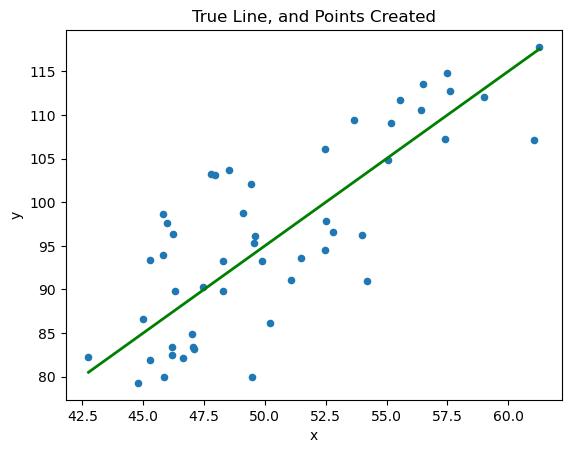

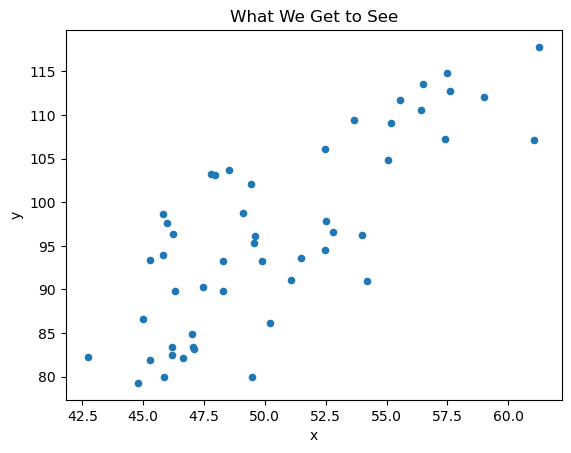

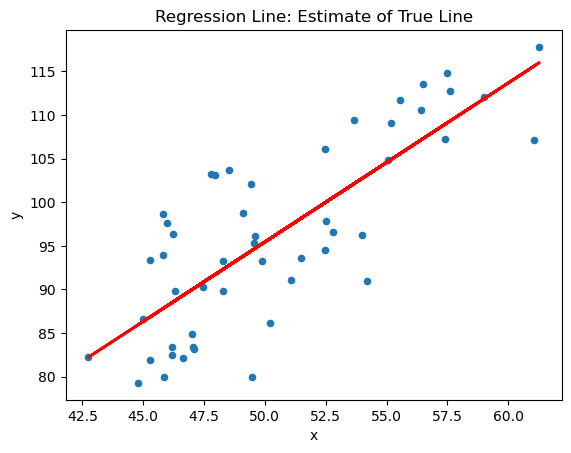

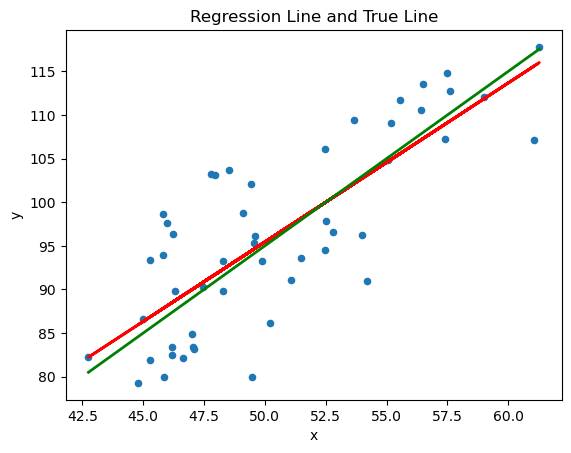

In [14]:
draw_and_compare(2, -5, 50)

## Inference for the True Slope ##

In [26]:
births = pd.read_csv('baby.csv')
births.head(3)

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True


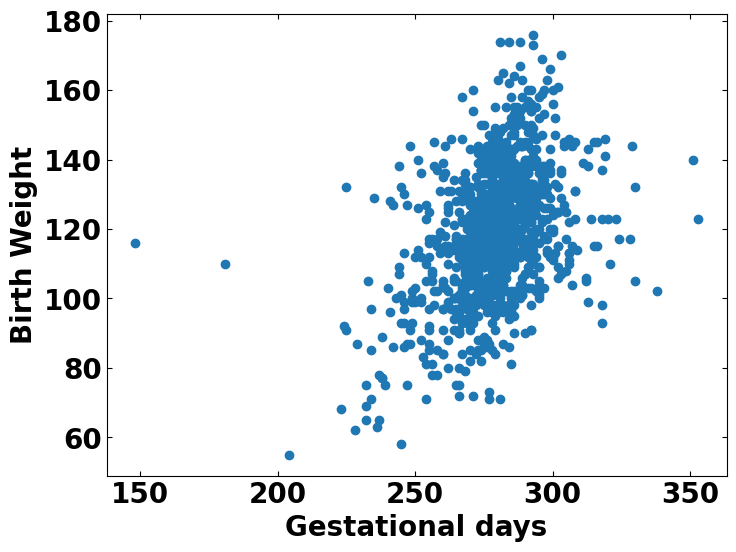

In [27]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')


ax1.scatter(births['Gestational Days'].values, births['Birth Weight'].values)
ax1.set_xlabel('Gestational days',fontsize=20,fontweight='bold')
ax1.set_ylabel('Birth Weight',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
plt.show()

In [31]:
# Preterm and postterm pregnancy cutoffs, according to the CDC
births=births[(births['Gestational Days']>37*7) & (births['Gestational Days']<42*7)]

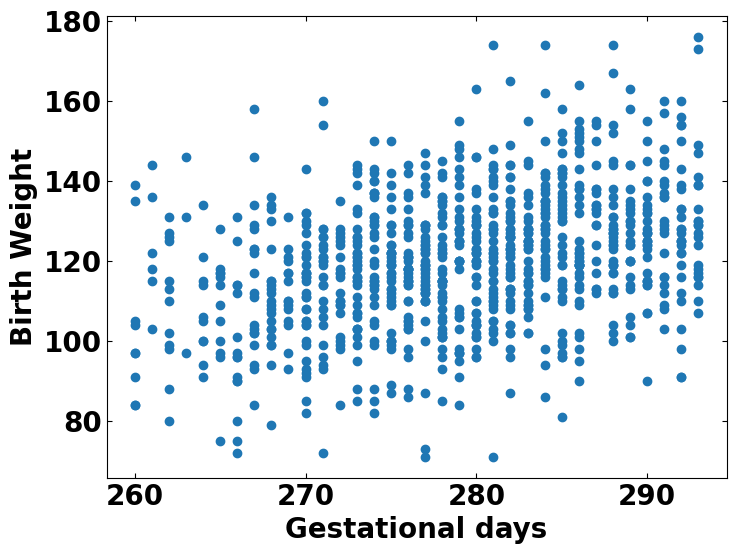

In [32]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')


ax1.scatter(births['Gestational Days'].values, births['Birth Weight'].values)
ax1.set_xlabel('Gestational days',fontsize=20,fontweight='bold')
ax1.set_ylabel('Birth Weight',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
plt.show()

y=0.738*x+-85.745


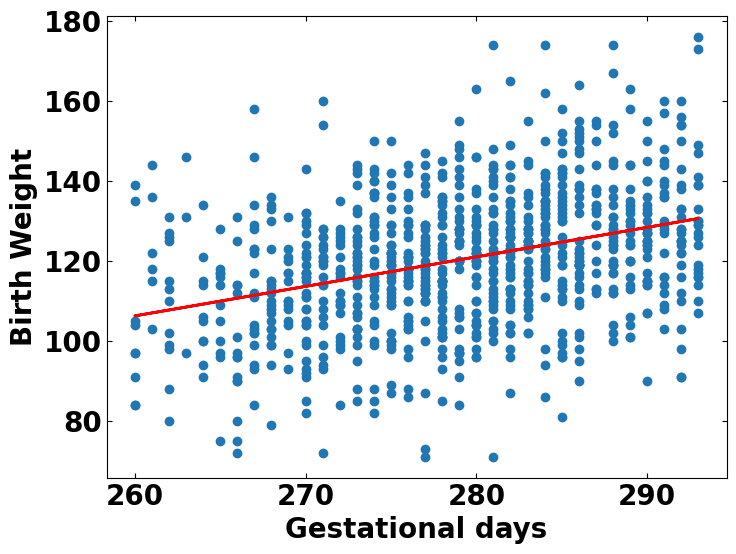

In [53]:
x_data = births['Gestational Days'].values.reshape(-1, 1)
y_data = births['Birth Weight'].values.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit (x_data, y_data)
a_ori,b_ori=regr.coef_[0][0],regr.intercept_[0]
print('y=%0.3f*x+%0.3f'%(a_ori,b_ori))
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

ax1.plot(births['Gestational Days'].values, births['Gestational Days'].values*a_ori+b_ori, lw=2, color='red')


ax1.scatter(births['Gestational Days'].values, births['Birth Weight'].values)
ax1.set_xlabel('Gestational days',fontsize=20,fontweight='bold')
ax1.set_ylabel('Birth Weight',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=20,direction='in',right='on',top='on')

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')
plt.show()

In [34]:
from scipy.stats import pearsonr
pearsonr(births['Gestational Days'].values,births['Birth Weight'].values)

PearsonRResult(statistic=0.3523463305698998, pvalue=1.1713110288431008e-28)

## Bootstrapping the Scatter Plot ##

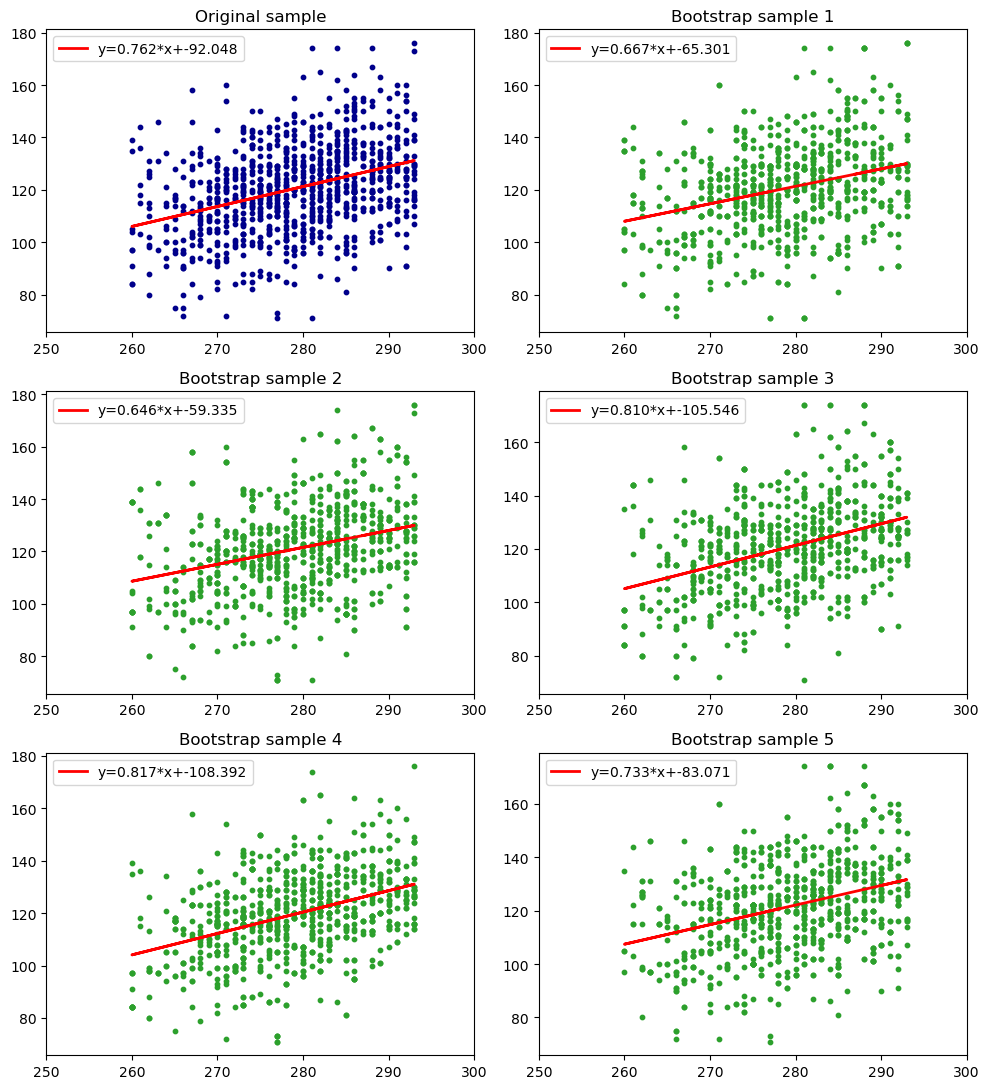

In [44]:
# You don't need to understand the plotting code in this cell,
# but you should understand the figure that comes out.

plt.figure(figsize=(10, 11))
plt.subplot(3, 2, 1)
plt.scatter(births['Gestational Days'], births['Birth Weight'], s=10, color='darkblue')
plt.xlim([250, 300])
plt.title('Original sample')
plt.plot(births['Gestational Days'].values, births['Gestational Days'].values*a_ori+b_ori, lw=2, color='red',label='y=%0.3f*x+%0.3f'%(a_ori,b_ori))
plt.legend()

for i in np.arange(1, 6, 1):
    plt.subplot(3,2,i+1)
    resampled = births.sample(n=len(births), replace=True).reset_index(drop=True)
    plt.scatter(resampled['Gestational Days'], resampled['Birth Weight'], s=10, color='tab:green')
    #add fit
    x_data = resampled['Gestational Days'].values.reshape(-1, 1)
    y_data = resampled['Birth Weight'].values.reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit (x_data, y_data)
    a,b=regr.coef_[0][0],regr.intercept_[0]
    plt.plot(resampled['Gestational Days'].values, resampled['Gestational Days'].values*a+b, lw=2, color='red',label='y=%0.3f*x+%0.3f'%(a,b))

    plt.xlim([250, 300])
    plt.title('Bootstrap sample '+str(i))
    plt.legend()
plt.tight_layout()

## Estimating the True Slope ##

In [48]:
# Make an array slope to store simulation values
slopes = []

# Simulation
for i in np.arange(5000):
    resampled = births.sample(n=len(births), replace=True).reset_index(drop=True)
    x_data = resampled['Gestational Days'].values.reshape(-1, 1)
    y_data = resampled['Birth Weight'].values.reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit (x_data, y_data)
    a,b=regr.coef_[0][0],regr.intercept_[0] 
    slopes.append(a)
# Convert slopes from array to DataFrame
slopes = pd.DataFrame({'Bootstrap Slope': slopes})

In [49]:
slopes

,Bootstrap Slope
0,0.704332
1,0.698544
2,0.635682
3,0.735540
4,0.727011
...,...
4995,0.783495
4996,0.826416
4997,0.673031
4998,0.789702


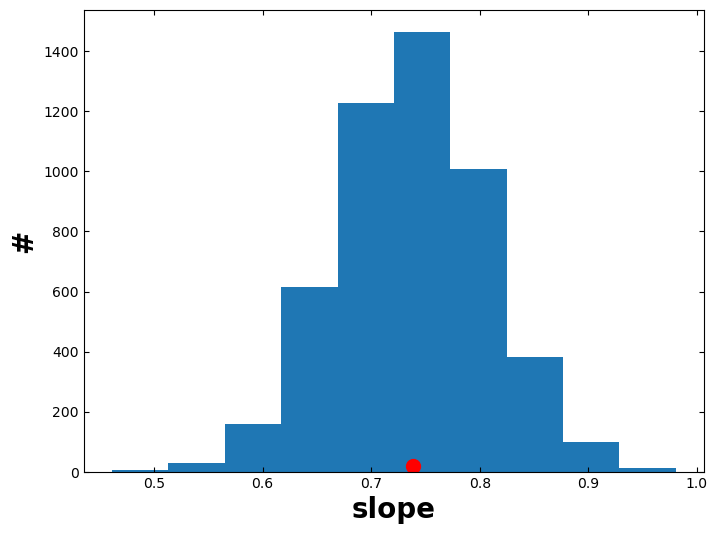

In [57]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.hist(slopes['Bootstrap Slope'].values)
ax1.set_ylabel('#',fontsize=20,fontweight='bold')
ax1.set_xlabel('slope',fontsize=20,fontweight='bold')
ax1.plot(a_ori, 20, 'ro',ms=10)                 # Additional point

ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')
plt.show()

## Confidence Interval for slope ##

In [122]:
left = np.percentile(slopes, q=2.5, method='higher')
right = np.percentile(slopes, q=97.5, method='higher')
print('Approximate 95%-confidence interval for the slope of true line:')
print(left, right, '(width =', right - left, ')') 

Approximate 95%-confidence interval for the slope of true line:
0.6042975378186026 0.8738587418561269 (width = 0.26956120403752426 )


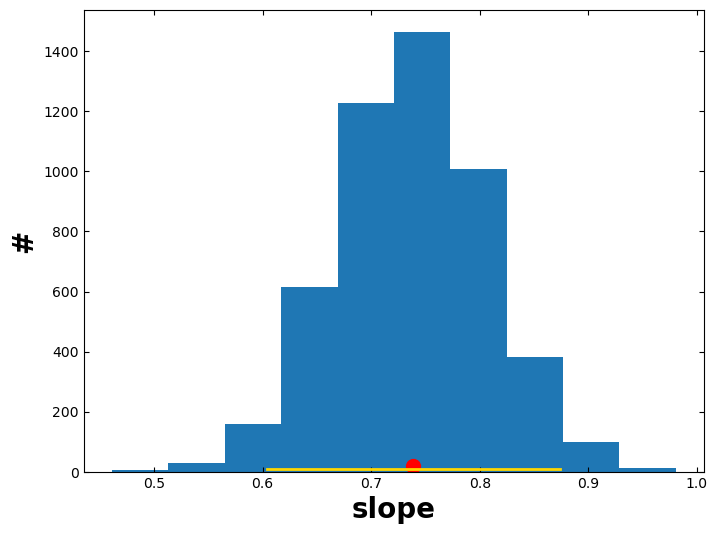

In [60]:
fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

# Horizontal Bar Plot
ax1.hist(slopes['Bootstrap Slope'].values)
ax1.set_ylabel('#',fontsize=20,fontweight='bold')
ax1.set_xlabel('slope',fontsize=20,fontweight='bold')
ax1.plot(a_ori, 20, 'ro',ms=10)                 # Additional point
ax1.plot([left,right],[10,10],color='gold',lw=2)
ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')
plt.show()

## Confidence Interval for predictions ##

In [63]:
def fitted_value(df, x, y, given_x):
    x_data = df[x].values.reshape(-1, 1)
    y_data = df[y].values.reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr.fit (x_data, y_data)
    a,b=regr.coef_[0][0],regr.intercept_[0] 
    return a * given_x+b

In [64]:
fit_300 = fitted_value(births, 'Gestational Days', 'Birth Weight', 300)
fit_300

135.69248314365456

In [66]:
def table_bootstrape_slopes(df, x, y, given_x, repetition=10):
    # Define DataFrame results to store each slope and intercept
    results = pd.DataFrame(columns=['slope', 'intercept', f'prediction at x={given_x}'])
    for i in np.arange(repetition):
        # Bootstrap sample_df from df
        sample_df = df.sample(n=len(df), replace=True).reset_index(drop=True)
        # Add intercept a and slope b to resutls
        x_data =sample_df[x].values.reshape(-1, 1)
        y_data = sample_df[y].values.reshape(-1, 1)
        regr = linear_model.LinearRegression()
        regr.fit (x_data, y_data)
        a,b=regr.coef_[0][0],regr.intercept_[0]
        fitted = a * given_x+b
        results.loc[len(results)] = [a, b, fitted]
    return results

In [67]:
table_bootstrape_slopes(births, 'Gestational Days', 'Birth Weight', 300)

,slope,intercept,prediction at x=300
0,0.677259,-69.753256,133.424557
1,0.808014,-105.312938,137.091303
2,0.704188,-75.811031,135.445355
3,0.644008,-59.063594,134.138770
4,0.861368,-120.592794,137.817639
5,0.775786,-97.384062,135.351821
6,0.722481,-81.405910,135.338247
7,0.746372,-88.649090,135.262424
8,0.700928,-75.912383,134.365969
9,0.639443,-58.394763,133.438055


In [115]:
from matplotlib.pyplot import cm
def draw_bootstrape_slopes(df, x, y,given_x, repetition=10):
    table=table_bootstrape_slopes(df, x, y, given_x)
    plt.figure()
    plt.scatter(df[x], df[y], s=10, color='darkblue')
    plt.xlim([280, 320])
    plt.ylim([min(table.iloc[:, 2])-5,max(table.iloc[:, 2])+5])

    for i in range(repetition):
        a,b=table.slope[i],table.intercept[i]
        col=cm.rainbow(np.linspace(0, 1, repetition))
        plt.plot(np.array([250, 350]), np.array([250, 350])*a+b, lw=2, color=col[i],label='y=%0.3f*x+%0.3f'%(a,b))
        plt.plot(given_x, table.iloc[:, 2][i],marker='s', ms=8, color=col[i])

        
        plt.legend()
    plt.show()

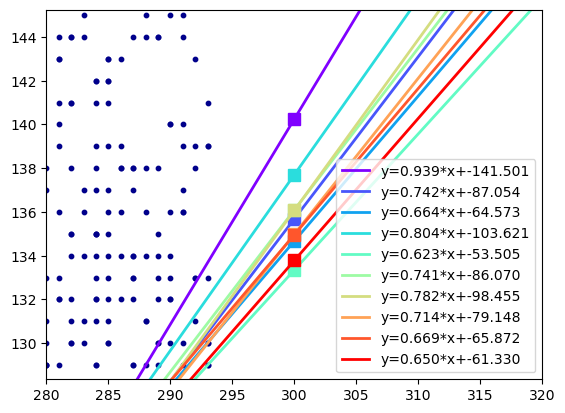

In [116]:
draw_bootstrape_slopes(births, 'Gestational Days', 'Birth Weight', 300)

In [123]:
# Bootstrap prediction of variable y at new_x
# Data contained in table; prediction by regression of y based on x
# repetitions = number of bootstrap replications of the original scatter plot

def bootstrap_prediction(df, x, y, new_x, repetitions):
    
    # For each repetition:
    # Bootstrap the scatter; 
    # get the regression prediction at new_x; 
    # augment the predictions list
    predictions = np.array([])
    for i in np.arange(repetitions):
        bootstrap_sample = df.sample(n=len(df), replace=True).reset_index(drop=True)
        bootstrap_prediction = fitted_value(bootstrap_sample, x, y, new_x)
        predictions = np.append(predictions, bootstrap_prediction)
        
    # Find the ends of the approximate 95% prediction interval
    left = np.percentile(predictions, q=2.5, method='higher')
    right = np.percentile(predictions, q=97.5, method='higher')
    
    print('Approximate 95%-confidence interval for height of true line:')
    print(left, right, '(width =', right - left, ')') 
    
    # Prediction based on original sample
    original = fitted_value(df, x, y, new_x)
    
    fig, ax1 = plt.subplots(figsize=(8,6), facecolor='w', edgecolor='k')

    # Horizontal Bar Plot
    ax1.hist(predictions)
    ax1.set_ylabel('#',fontsize=20,fontweight='bold')
    ax1.set_xlabel('Bootstrap predictions',fontsize=20,fontweight='bold')
    ax1.plot(original, 20, 'ro',ms=10)                 # Additional point
    ax1.plot([left,right],[20,20],color='gold',lw=2)
    ax1.tick_params(axis='both', which='major', labelsize=10,direction='in',right='on',top='on')
    plt.show()

Approximate 95%-confidence interval for height of true line:
132.73664343321954 138.57689628855206 (width = 5.840252855332523 )


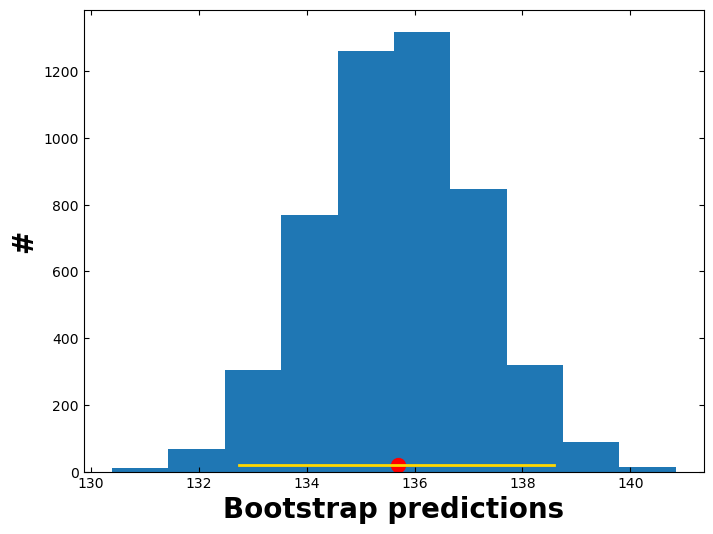

In [124]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 300, 5000)

### Words of caution ###

All of the predictions and tests that we have performed in this chapter assume that the regression model holds. Specifically, the methods assume that the scatter plot resembles points generated by starting with points that are on a straight line and then pushing them off the line by adding random normal noise.

If the scatter plot does not look like that, then perhaps the model does not hold for the data. If the model does not hold, then calculations that assume the model to be true are not valid.

Therefore, we must first decide whether the regression model holds for our data, before we start making predictions based on the model or testing hypotheses about parameters of the model. A simple way is to to draw the scatter diagram of the two variables and see whether it looks roughly linear and evenly spread out around a line. We should also run the diagnostics  using the residual plot.